In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
!pip install pingouin
import pingouin as pg

In [151]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [152]:
data.shape


(39644, 61)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  int64  
 2    n_tokens_title                 39644 non-null  int64  
 3    n_tokens_content               39644 non-null  int64  
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  int64  
 8    num_self_hrefs                 39644 non-null  int64  
 9    num_imgs                       39644 non-null  int64  
 10   num_videos                     39644 non-null  int64  
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [154]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [155]:
data.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [156]:
data.columns = data.columns.str.strip()

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  int64  
 2   n_tokens_title                 39644 non-null  int64  
 3   n_tokens_content               39644 non-null  int64  
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  int64  
 8   num_self_hrefs                 39644 non-null  int64  
 9   num_imgs                       39644 non-null  int64  
 10  num_videos                     39644 non-null  int64  
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [158]:
binary_features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for f in binary_features:
    data[f] = data[f].astype('bool')
data['data_channel_is_entertainment']

0         True
1        False
2        False
3         True
4        False
         ...  
39639    False
39640    False
39641    False
39642    False
39643     True
Name: data_channel_is_entertainment, Length: 39644, dtype: bool

In [159]:
int_features = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for f in int_features:
    data[f] = data[f].astype('int64')
data['n_tokens_title']

0        12
1         9
2         9
3         9
4        13
         ..
39639    11
39640    12
39641    10
39642     6
39643    10
Name: n_tokens_title, Length: 39644, dtype: int64

In [160]:
data = data.drop(columns=['url', 'timedelta'])   #I have done this bcs they wont affect the dependant variable

In [161]:
numerical_cols = list(data.select_dtypes(exclude="string").columns)
print(numerical_cols)
print(len(numerical_cols))

['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarit

In [162]:
data.nunique()

n_tokens_title                      20
n_tokens_content                  2406
n_unique_tokens                  24878
n_non_stop_words                    52
n_non_stop_unique_tokens         21253
num_hrefs                          133
num_self_hrefs                      59
num_imgs                            91
num_videos                          53
average_token_length             30136
num_keywords                        10
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          26
kw_max_min                        1076
kw_avg_min                       17003
kw_min_max                        1021
kw_max_max                          35
kw_avg_max                       30834
kw_min_avg                       15982
kw_max_avg                       19438
kw_avg_avg               

In [163]:
data.corr(method="pearson", numeric_only=True)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,-0.071403,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,0.167789,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,0.026407,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,0.031554,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,0.034185,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,0.222588,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,0.126879,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,0.033924,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,-0.002940,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936
average_token_length,-0.071403,0.167789,0.026407,0.031554,0.034185,0.222588,0.126879,0.033924,-0.002940,1.000000,...,0.222207,0.471383,-0.324529,-0.278784,-0.194660,-0.040406,-0.016718,0.026586,-0.036953,-0.022007


Text(0.5, 1.0, 'Correlation of numerical attributes with Shares')

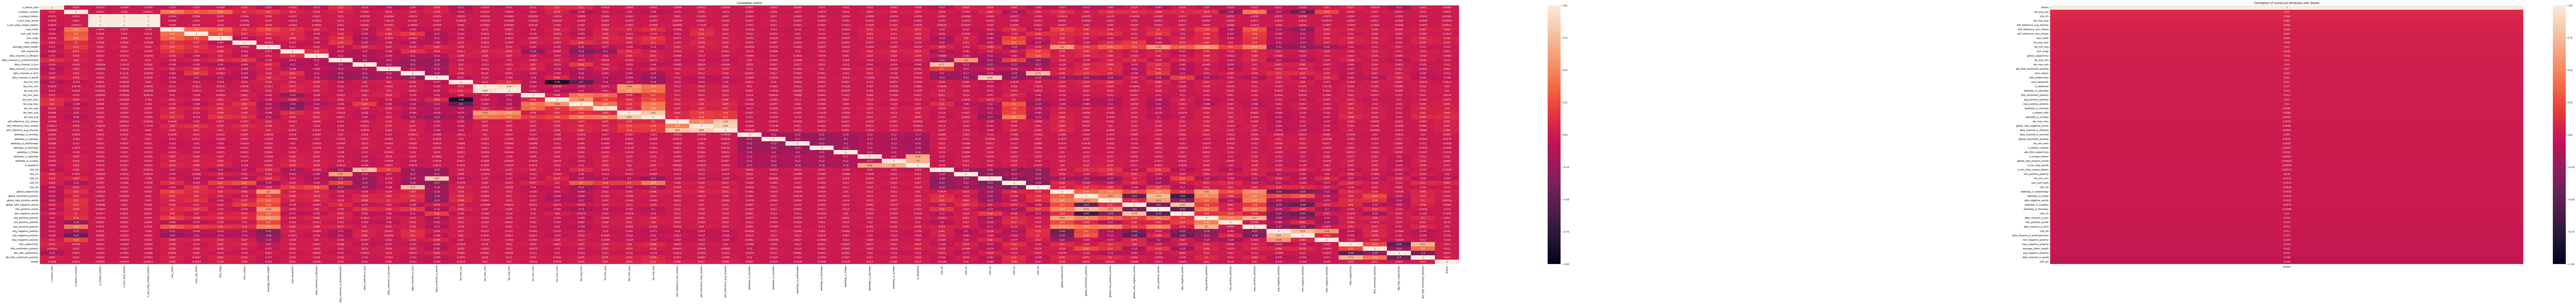

In [164]:
f, axs = plt.subplots(1, 2, figsize=(200, 20), width_ratios=[3, 1])

sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["shares"]].sort_values('shares', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with Shares")

<Axes: >

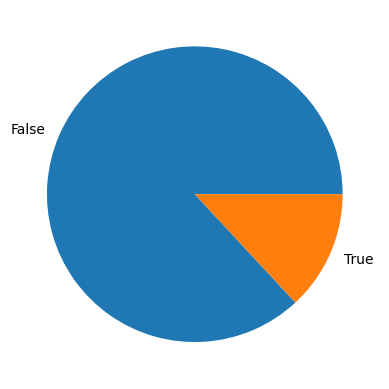

In [165]:
data.groupby('is_weekend').size().plot(kind='pie')


In [166]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="num_keywords", nbins=15, title="Distribution of keywords")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()


<Figure size 2000x1000 with 0 Axes>

In [167]:
pg.corr(data['num_imgs'], data['shares'])    #here i will get r value, low r value means less relation with the dependant variable.

,n,r,CI95%,p-val,BF10,power
pearson,39644,0.039388,"[0.03, 0.05]",4.323223e-15,1.456e+11,1.0


In [168]:
pg.ttest(data['shares'].where(data['num_videos']>0), data['shares'].where(data['num_videos']==0))

#Here the p-value is very very less that means, that our assumption is wrong, which is that number of shares don't depend on whether the
# article contains a video or not. So we were wrong hence no of shares increase if it contains a video.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,9.273742,17135.122718,two-sided,2.006352e-20,"[1077.76, 1655.45]",0.117725,5.215e+16,1.0


In [169]:
pg.normality(data['n_tokens_title'])  #It doesnt follow normal distribution (like maybe skewed)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



,W,pval,normal
n_tokens_title,0.979322,0.0,False


In [170]:
pg.ttest(data['shares'].where(data['is_weekend']==True), data['shares'].where(data['is_weekend']==False))
#shares depend on whether it is a weekend or not

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.59943,7179.482883,two-sided,0.000321,"[266.19, 902.89]",0.050281,10.856,0.921739


In [171]:
pg.ttest(data['shares'].where(data['rate_positive_words']>data['rate_negative_words']), data['shares'])
#pvalue is significant that means, articles with positive sentiments are shared more than the articles with negative sentiments.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.255485,71847.651455,two-sided,0.798349,"[-192.92, 148.43]",0.001887,0.009,0.057542


<h2> Testing on different Models </h2>

In [172]:
X = data.drop(columns=['shares'])
y = data["shares"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [173]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#I also tried RobustScaler and MinMaxScaler, the result was close enough only hence i went with StandardScaler.

<h3> Linear Regression </h3>

In [174]:
from sklearn.linear_model import LinearRegression,ARDRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
preds=LR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

accuracies = pd.DataFrame({"Algorithm": ["Linear Regression"], "Score":[mean_absolute_error(y_test, preds)]})


The mean absolute error:
2951.385479097708



<h3> Decision Tree Regressor </h3>

In [175]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
preds=DTR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

accuracies.loc[len(accuracies)]={"Algorithm": "DecisionTreeRegressor", "Score":mean_absolute_error(y_test, preds)}


The mean absolute error:
4311.780300163955



<h3> KNeighborsRegressor </h3>

In [176]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(X_train,y_train)
preds=KNR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
accuracies.loc[len(accuracies)]={"Algorithm": "KNeighborsRegressor", "Score":mean_absolute_error(y_test, preds)}

The mean absolute error:
3065.042048177576



<h3>RandomForestRegressor </h3>

In [177]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)
preds=RFR.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
accuracies.loc[len(accuracies)]={"Algorithm": "RandomForestRegressor", "Score":mean_absolute_error(y_test, preds)}

The mean absolute error:
3295.558915373944



<h3>XGBRegressor</h3>

In [178]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
preds=XGB.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

accuracies.loc[len(accuracies)]={"Algorithm": "XGBRegressor", "Score": mean_absolute_error(y_test, preds)}

The mean absolute error:
3236.031272001744



In [180]:
plt.figure(figsize=(20, 10))
fig = px.bar(data_frame=accuracies, x="Algorithm", y="Score", title="Mean Absolute Error of Various Algorithms", range_y=[1000, 6000],)
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>